# ClusterAI 2020
Ciencia de Datos - Ingenieria Industrial UTN BA
Curso I5521

In [1]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')


In [2]:
file = 'base_estudio_discapacidad_2018.csv'

In [3]:
estudio = pd.read_csv(file, engine = 'python', error_bad_lines=False, delimiter= ';')

# Uso engine= 'python' y Erro_bad_lines = False porque sino tira un error al leer cierto tipo de lineas.

# Error_bad_lines lo uso para.Las líneas con demasiados campos (por ejemplo, una línea csv con demasiadas comas) 
# provocarán de forma predeterminada que se genere una excepción y no se devolverá ningún DataFrame. 
# Si es False, estas "líneas incorrectas" se eliminarán del DataFrame que se devuelve.

# Engine = 'python' lo uso para cuando
# Se genera una advertencia al leer un archivo que no usa el analizador 'c' predeterminado.
# Ocurre debido a la falta de soporte o funcionalidad para analizar un atributo particular de un archivo CSV con el motor solicitado.
# La advertencia se puede evitar agregando engine = 'python' como parámetro en los métodos pd.read_csv y pd.read_table .

# Uso delimiter=';' para separar las columnas al leerlas

In [4]:
filas = np.shape(estudio)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(estudio)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}\r\n')

print ('Output de ".head(5)": ')
estudio.head(5)

Filas: 82327
Columnas: 35

Output de ".head(5)": 


,ID,pondera,personas_hogar,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,pa01,Relación de parentesco,Sexo,edad_grandes_grupos,...,Sabe leer y escribir,Asiste a establecimiento educativo,Modalidad educativa de asistencia actual y pasada,Máximo nivel educativo alcanzado,Principal motivo de no cursar actualmente/nunca cursó,Convive en pareja,Estado civil legal,Motivo principal por el que no busco trabajo,Condición de actividad,Categoría ocupacional
0,1,413,4,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,1,Jefe/a,Varón,15 a 64,...,,,,,,,,,,
1,2,473,5,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,3,Hija(o)/ hijastra(o),Varón,15 a 64,...,,,,,,,,,,
2,3,473,5,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,4,Hija(o)/ hijastra(o),Varón,15 a 64,...,,,,,,,,,,
3,4,473,5,Hogares sin personas con dificultad,,Hogar multipersonal familiar nuclear,5,Hija(o)/ hijastra(o),Varón,0 a 14,...,,,,,,,,,,
4,5,409,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,1,Jefe/a,Mujer,15 a 64,...,,,,,,,,,,


In [5]:
# Para saber el nombre de la columnas

nombre_columnas = estudio.columns.values
nombre_columnas

array(['ID', 'pondera', 'personas_hogar', 'hogar_dificultad',
       'personas_dificultad_hogar', 'tipo_hogar', 'pa01',
       'Relación de parentesco', 'Sexo', 'edad_grandes_grupos',
       'edad_agrupada', 'imputadoB', 'imputadoC', 'imputadoD',
       'Personas de 6 años y más con dificultad',
       'Personas con dificultad considerando toda la población',
       'Cantidad de dificultades', 'Cantidad y tipo de dificultad',
       'certificado', 'Comienzo de la dificultad', 'edad_inicio',
       'Causa de la dificultad', 'Cobertura de salud',
       'Recibe jubilación o pensión',
       'Tipo de beneficioSabe leer y escribir que recibe',
       'Sabe leer y escribir', 'Asiste a establecimiento educativo',
       'Modalidad educativa de asistencia actual y pasada',
       'Máximo nivel educativo alcanzado',
       'Principal motivo de no cursar actualmente/nunca cursó',
       'Convive en pareja', 'Estado civil legal',
       'Motivo principal por el que no busco trabajo',
       'Con

In [6]:
# Verifico si hay Nans en las columnas


col_NaN = estudio.isnull().any()
print(col_NaN,'\r\n')

ID                                                        False
pondera                                                   False
personas_hogar                                            False
hogar_dificultad                                          False
personas_dificultad_hogar                                 False
tipo_hogar                                                False
pa01                                                      False
Relación de parentesco                                    False
Sexo                                                      False
edad_grandes_grupos                                       False
edad_agrupada                                             False
imputadoB                                                 False
imputadoC                                                 False
imputadoD                                                 False
Personas de 6 años y más con dificultad                   False
Personas con dificultad considerando tod

In [7]:

estudio_con_discapacidad = estudio.loc[estudio['Personas con dificultad considerando toda la población'] == 'Personas con dificultad']

In [8]:
np.shape(estudio_con_discapacidad)

(7944, 35)

In [9]:
estudio_con_discapacidad.head(10)

,ID,pondera,personas_hogar,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,pa01,Relación de parentesco,Sexo,edad_grandes_grupos,...,Sabe leer y escribir,Asiste a establecimiento educativo,Modalidad educativa de asistencia actual y pasada,Máximo nivel educativo alcanzado,Principal motivo de no cursar actualmente/nunca cursó,Convive en pareja,Estado civil legal,Motivo principal por el que no busco trabajo,Condición de actividad,Categoría ocupacional
5,6,409,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,2,Madre/padre/suegra(o),Mujer,65 y más,...,Sí,"No está cursando, pero cursó",Solo común,Hasta primario completo,Terminó sus estudios/no quiere seguir estudiando,No,Soltera(o),Es jubilada(o) o pensionada(o),Inactivo,
13,14,269,2,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,1,Jefe/a,Varón,15 a 64,...,Sí,"No está cursando, pero cursó",Solo común,Secundario incompleto,No accedió a la escuela a causa de la discapac...,No,Soltera(o),Es jubilada(o) o pensionada(o),Inactivo,
15,16,248,1,Hogares con personas con dificultad,1,Hogar unipersonal,1,Jefe/a,Varón,15 a 64,...,Sí,"No está cursando, pero cursó",Solo común,Secundario incompleto,Terminó sus estudios/no quiere seguir estudiando,No,Soltera(o),Cree que no va a conseguir trabajo a causa de ...,Inactivo,
53,54,858,7,Hogares con personas con dificultad,2,Hogar multipersonal familiar extendido,5,Nieta(o),Mujer,0 a 14,...,,"Sí, cursa",Solo común,Hasta primario completo,,,,,,
55,56,858,7,Hogares con personas con dificultad,2,Hogar multipersonal familiar extendido,7,Nieta(o),Mujer,0 a 14,...,,,,,,,,,,
68,69,600,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,2,Hija(o)/ hijastra(o),Varón,0 a 14,...,,"Sí, cursa",Solo especia,Hasta primario completo,,,,,,
92,93,463,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,3,Hija(o)/ hijastra(o),Mujer,15 a 64,...,No,"Sí, cursa",Solo especia,No especifica nivel/ignorado,,No,Soltera(o),Otro motivo,Inactivo,
130,131,25,2,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,2,Cónyuge o pareja,Varón,65 y más,...,Sí,"No está cursando, pero cursó",Solo común,Secundario incompleto,Terminó sus estudios/no quiere seguir estudiando,Sí,Casada(o),Es jubilada(o) o pensionada(o),Inactivo,
138,139,22,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,3,Hija(o)/ hijastra(o),Mujer,15 a 64,...,Sí,"No está cursando, pero cursó",Solo común,"Superior no universitario, universitario y pos...",No accedió a la escuela a causa de la discapac...,No,Soltera(o),"Problemas de accesibilidad en la vía pública, ...",Inactivo,
151,152,582,7,Hogares con personas con dificultad,2,Hogar multipersonal familiar extendido,2,Cónyuge o pareja,Mujer,15 a 64,...,Sí,"No está cursando, pero cursó",Solo común,Secundario incompleto,Otro motivo,Sí,En unión civil o convivencial legal,Otro motivo,Inactivo,


In [10]:
print("Los registros de la Personas con discapacidad en el hogar representan el " + str(np.round(np.shape(estudio_con_discapacidad)[0]/np.shape(estudio)[0],2) * 100) + "% de los registros totales")

Los registros de la Personas con discapacidad en el hogar representan el 10.0% de los registros totales


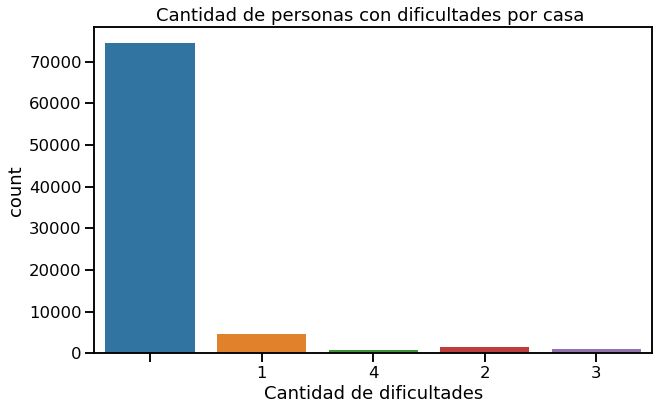

In [11]:
# con el comando "countplot" de Seaborn (importado como sns) generamos un gráfico de barras por la columna "Cantidad de dificultades"
sns.set_context("talk")
plt.figure(figsize=(10,6))
sns.countplot(x = "Cantidad de dificultades", data=estudio)
plt.title("Cantidad de personas con dificultades por casa ")
plt.show()

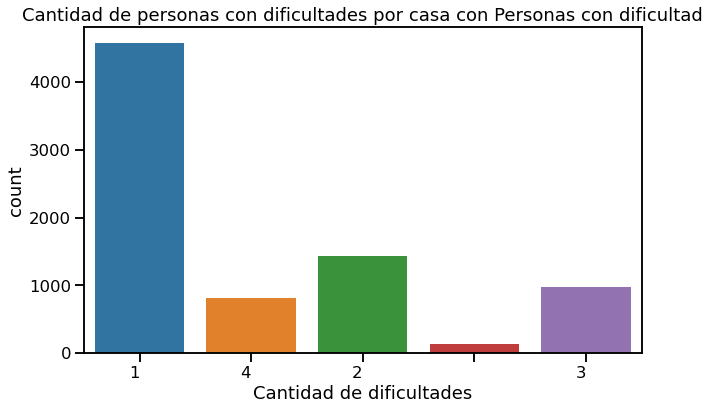

In [12]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Cantidad de dificultades", data=estudio_con_discapacidad)
ax.set_xticklabels(ax.get_xticklabels(),  ha="right")
plt.title("Cantidad de personas con dificultades por casa con Personas con dificultad")
plt.show()

In [13]:
estudio_con_certificado = estudio_con_discapacidad.loc[estudio_con_discapacidad['certificado'] == 'Tiene certificado de discapacidad vigente']

In [14]:
np.shape(estudio_con_certificado)


(2738, 35)

In [15]:
estudio_con_certificado.head()

,ID,pondera,personas_hogar,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,pa01,Relación de parentesco,Sexo,edad_grandes_grupos,...,Sabe leer y escribir,Asiste a establecimiento educativo,Modalidad educativa de asistencia actual y pasada,Máximo nivel educativo alcanzado,Principal motivo de no cursar actualmente/nunca cursó,Convive en pareja,Estado civil legal,Motivo principal por el que no busco trabajo,Condición de actividad,Categoría ocupacional
13,14,269,2,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,1,Jefe/a,Varón,15 a 64,...,Sí,"No está cursando, pero cursó",Solo común,Secundario incompleto,No accedió a la escuela a causa de la discapac...,No,Soltera(o),Es jubilada(o) o pensionada(o),Inactivo,
15,16,248,1,Hogares con personas con dificultad,1,Hogar unipersonal,1,Jefe/a,Varón,15 a 64,...,Sí,"No está cursando, pero cursó",Solo común,Secundario incompleto,Terminó sus estudios/no quiere seguir estudiando,No,Soltera(o),Cree que no va a conseguir trabajo a causa de ...,Inactivo,
68,69,600,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,2,Hija(o)/ hijastra(o),Varón,0 a 14,...,,"Sí, cursa",Solo especia,Hasta primario completo,,,,,,
92,93,463,3,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,3,Hija(o)/ hijastra(o),Mujer,15 a 64,...,No,"Sí, cursa",Solo especia,No especifica nivel/ignorado,,No,Soltera(o),Otro motivo,Inactivo,
130,131,25,2,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,2,Cónyuge o pareja,Varón,65 y más,...,Sí,"No está cursando, pero cursó",Solo común,Secundario incompleto,Terminó sus estudios/no quiere seguir estudiando,Sí,Casada(o),Es jubilada(o) o pensionada(o),Inactivo,


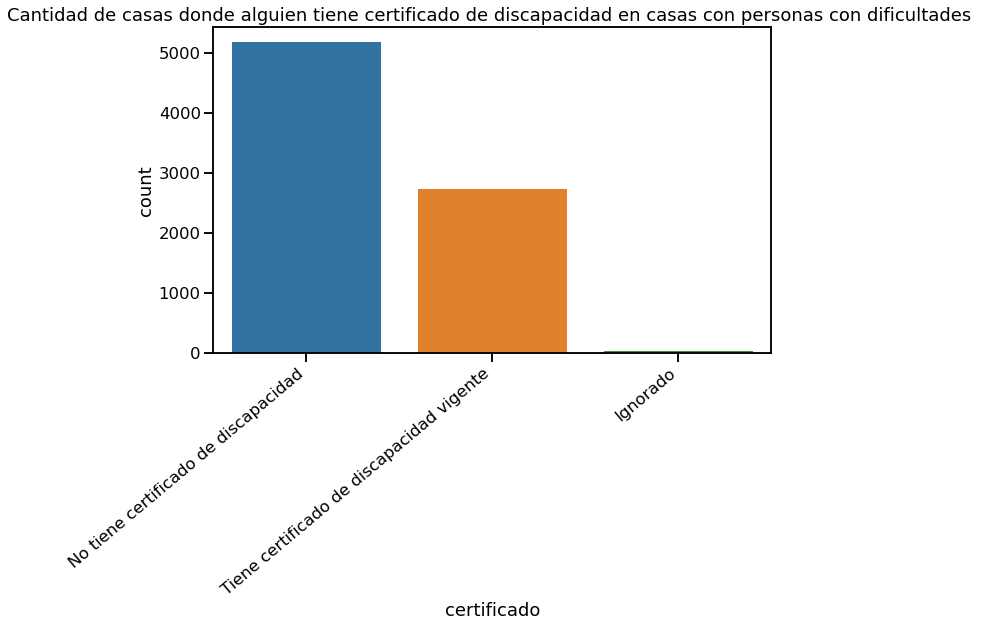

In [16]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="certificado", data=estudio_con_discapacidad)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Cantidad de casas donde alguien tiene certificado de discapacidad en casas con personas con dificultades ")
plt.show()

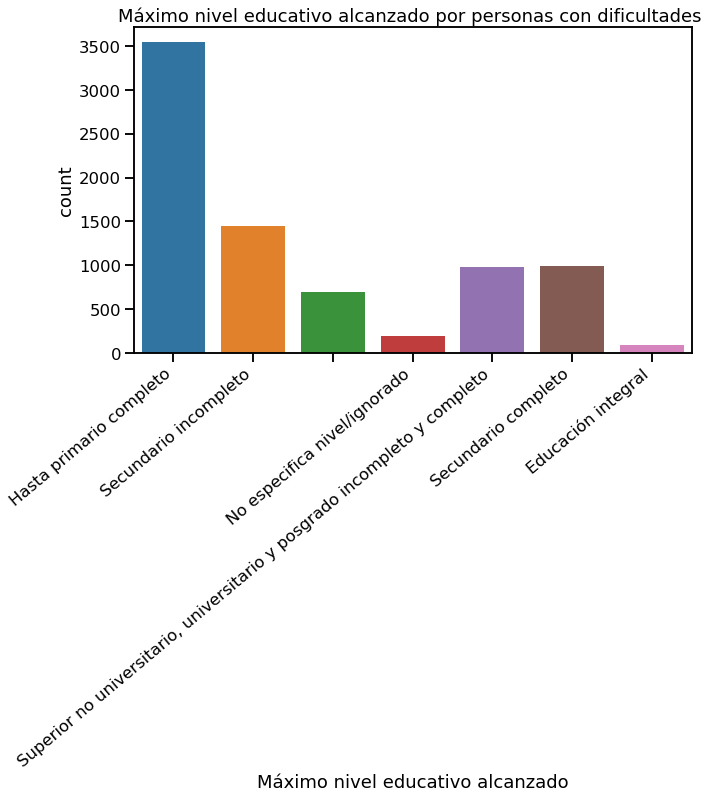

In [19]:
estudio_con_discapacidad
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Máximo nivel educativo alcanzado", data=estudio_con_discapacidad)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Máximo nivel educativo alcanzado por personas con dificultades ")
plt.show()


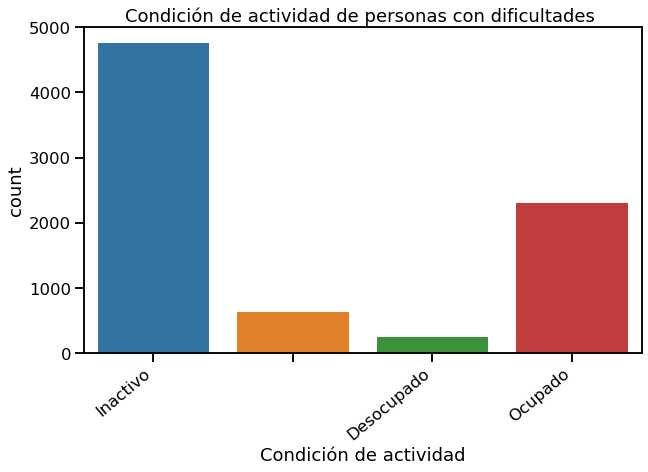

In [26]:
estudio_con_discapacidad
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Condición de actividad", data=estudio_con_discapacidad)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Condición de actividad de personas con dificultades ")
plt.show()

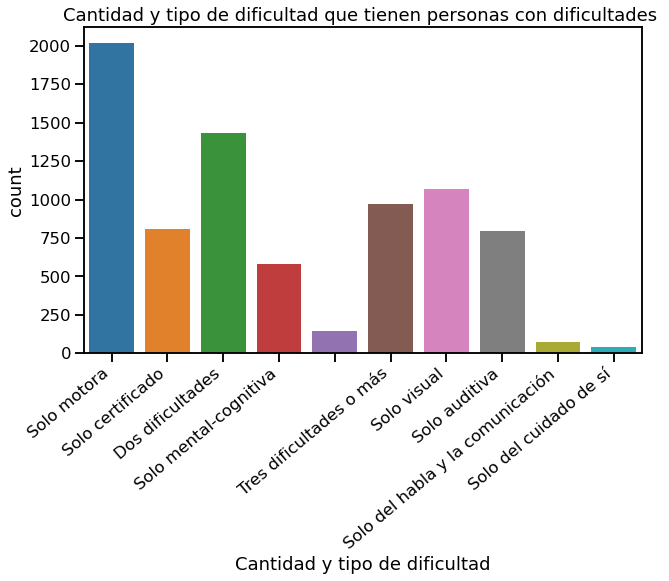

In [43]:
estudio_con_discapacidad
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Cantidad y tipo de dificultad", data=estudio_con_discapacidad)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Cantidad y tipo de dificultad que tienen personas con dificultades ")
plt.show()

In [28]:
estudio_con_discapacidad_inactivo = estudio_con_discapacidad.loc[estudio_con_discapacidad['Condición de actividad'] == 'Inactivo']

In [35]:
np.shape(estudio_con_discapacidad_inactivo)

(4763, 35)

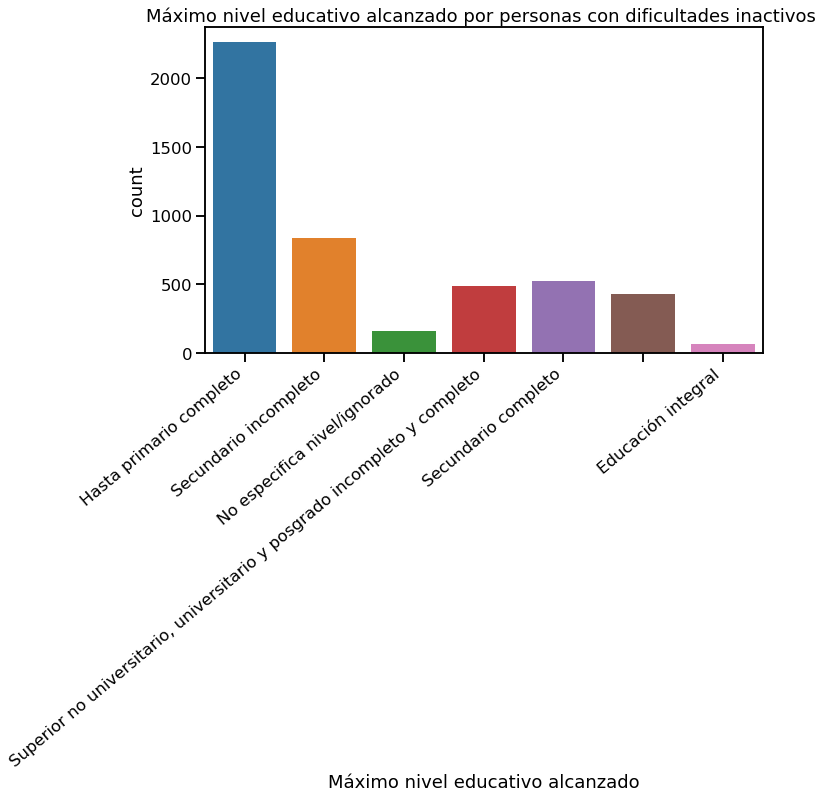

In [36]:
estudio_con_discapacidad_inactivo
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Máximo nivel educativo alcanzado", data=estudio_con_discapacidad_inactivo)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Máximo nivel educativo alcanzado por personas con dificultades inactivos ")
plt.show()

In [ ]:
# Se puede notar una relacion entre la INACTIVIDAD y no haber terminado los estudios primarios y en menor medida los secundarios.

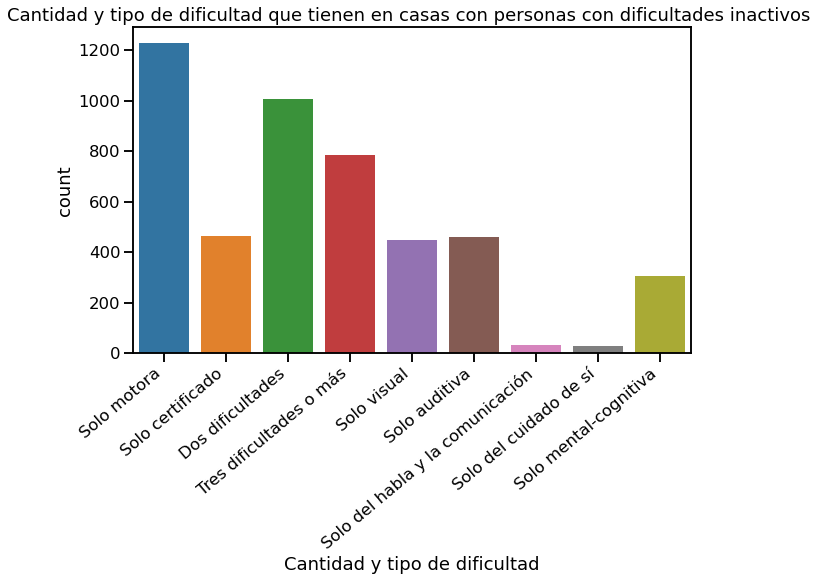

In [37]:
estudio_con_discapacidad_inactivo
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Cantidad y tipo de dificultad", data=estudio_con_discapacidad_inactivo)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Cantidad y tipo de dificultad que tienen en casas con personas con dificultades inactivos ")
plt.show()

In [ ]:
# Hay una gran cantidad de personas con dificultades inactivas que solo tienen una deficiencia motora
# Se podrian reasignar a trabajos donde no haya necesidad de contar con esta capacidad

In [38]:
estudio_con_discapacidad_ocupado = estudio_con_discapacidad.loc[estudio_con_discapacidad['Condición de actividad'] == 'Ocupado']

In [39]:
np.shape(estudio_con_discapacidad_ocupado)

(2303, 35)

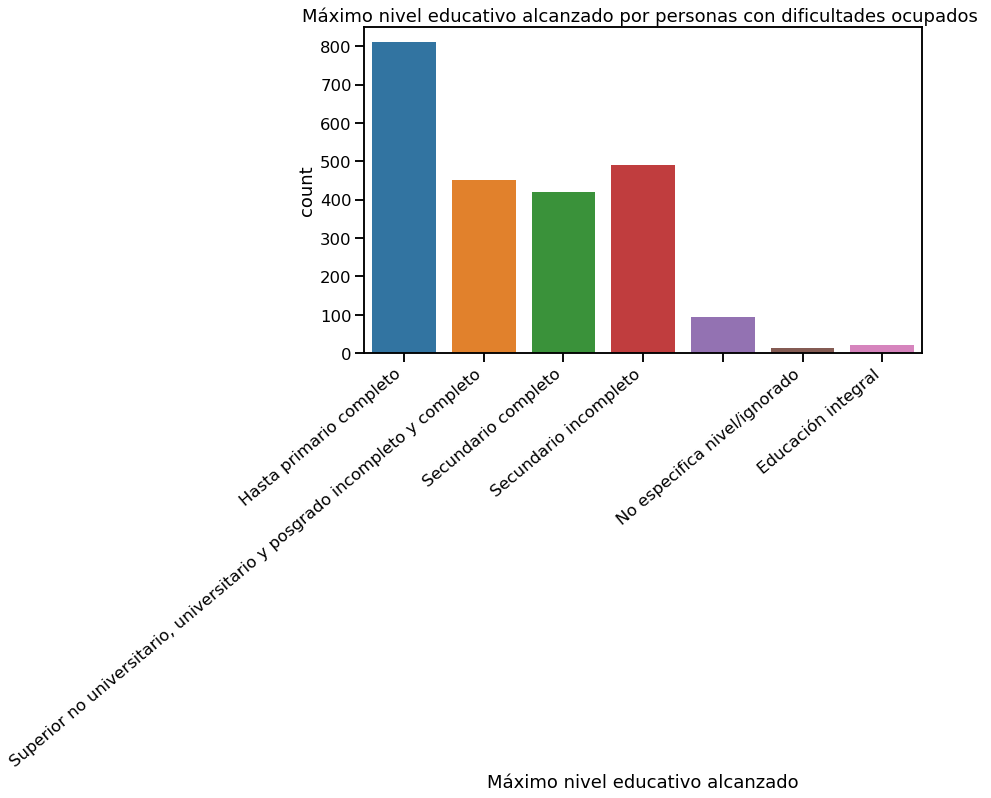

In [40]:
estudio_con_discapacidad_ocupado
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Máximo nivel educativo alcanzado", data=estudio_con_discapacidad_ocupado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Máximo nivel educativo alcanzado por personas con dificultades ocupados ")
plt.show()

In [ ]:
# La relacion de personas con dificultades ocupadas y su nivel educativo
# Si bien disminuye la cantidad de personas que no terminaron la primaria y secundaria
# no hay un aumento en las cantidades de personas que completaron la secundaria o siguieron sus estudios

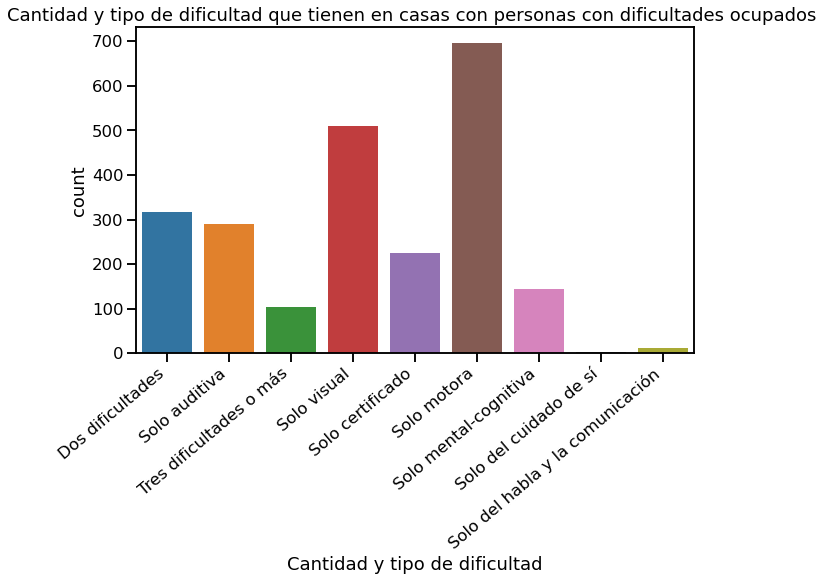

In [41]:
data=estudio_con_discapacidad_ocupado
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Cantidad y tipo de dificultad", data=estudio_con_discapacidad_ocupado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Cantidad y tipo de dificultad que tienen en casas con personas con dificultades ocupados ")
plt.show()

In [ ]:
# Se puede notar que las personas que mejor se incertan en el mundo laboral son aquellas que tienen dificulatades motoras 
# seguidas por personas con difultades visuales

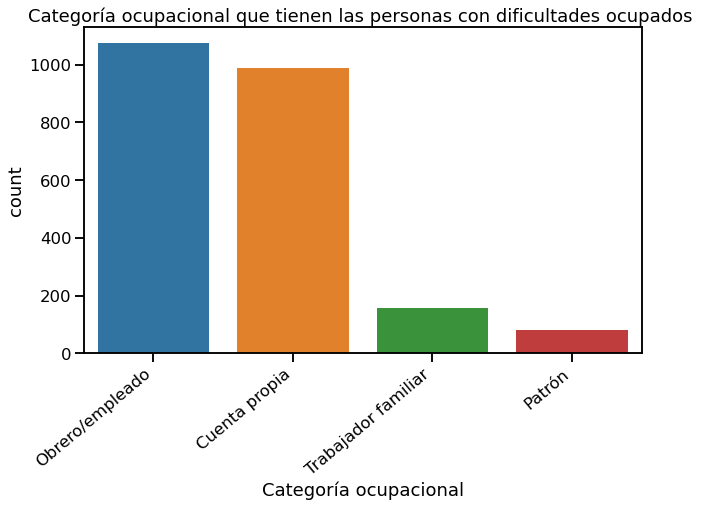

In [42]:
data=estudio_con_discapacidad_ocupado
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Categoría ocupacional", data=estudio_con_discapacidad_ocupado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Categoría ocupacional que tienen las personas con dificultades ocupados ")
plt.show()